In [1]:
import os
import gc
import pickle
import time
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
PATH_TO_DATA = 'data/predict_future_sales'
data = pd.read_pickle('matrix_fe2.pkl')
test = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv'))

print(len(data.columns))
data.columns

35


Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'ID',
       'shop_city', 'shop_category', 'item_category_id', 'name_2', 'name_3',
       'type_code', 'subtype_code', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_cat_avg_item_cnt_lag_1',
       'date_shop_cat_avg_item_cnt_lag_1',
       'date_shop_item_avg_item_cnt_lag_1_x',
       'date_shop_subtype_avg_item_cnt_lag_1', 'date_city_avg_item_cnt_lag_1',
       'date_item_city_avg_item_cnt_lag_1',
       'date_shop_item_avg_item_cnt_lag_1_y', 'delta_price_lag',
       'delta_revenue_lag_1', 'month', 'days', 'item_shop_first_sale',
       'item_first_sale'],
      dtype='object')

In [3]:
data['is_dec'] = data['month'].apply(lambda x: 1 if x ==11 else 0)

In [4]:
data = data[['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'ID',
       'shop_city', 'shop_category', 'item_category_id', 'name_2', 'name_3',
       'type_code', 'subtype_code', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_cat_avg_item_cnt_lag_1',
       'date_shop_cat_avg_item_cnt_lag_1',
       'date_shop_item_avg_item_cnt_lag_1_x',
       'date_shop_subtype_avg_item_cnt_lag_1', 'date_city_avg_item_cnt_lag_1',
       'date_item_city_avg_item_cnt_lag_1',
       'delta_price_lag','date_shop_item_avg_item_cnt_lag_1_y',
       'delta_revenue_lag_1', 'month', 'days', 'item_shop_first_sale','is_dec',
       'item_first_sale']]

In [13]:
len(data.columns)

36

In [5]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [6]:
del data
gc.collect();

In [7]:
model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    tree_method='gpu_hist',
    seed=42)

In [8]:
%%time
model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

/home/vs/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/vs/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:15:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.17453	validation_1-rmse:1.11415
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.12428	validation_1-rmse:1.07468
[2]	validation_0-rmse:1.08139	validation_1-rmse:1.04299
[3]	validation_0-rmse:1.04481	validation_1-rmse:1.0174
[4]	validation_0-rmse:1.013	validation_1-rmse:0.995989
[5]	validation_0-rmse:0.986577	validation_1-rmse:0.978566
[6]	validation_0-rmse:0.965206	validation_1-rmse:0.965333
[7]	validation_0-rmse:0.945714	validation_1-rmse:0.95352
[8]	validation_0-rmse:0.926785	validation_1-rmse:0.945228
[9]	validation_0-rmse:0.911865	validation_1-rmse:0.937198
[10]	validation_0-rmse:0.899268	validation_1-rmse:0.932012
[11]	validation_0-rmse:0.888192	validation_1-rmse:0.92654
[12]	validation_0-rmse:0.87937

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=0.5, missing=None,
             n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, silent=None, subsample=0.8, tree_method='gpu_hist',
             verbosity=1)

In [9]:
Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)

In [10]:
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission2.csv', index=False)

In [ ]:
# save predictions for an ensemble
pickle.dump(Y_pred, open('xgb_train.pickle', 'wb'))
pickle.dump(Y_test, open('xgb_test.pickle', 'wb'))

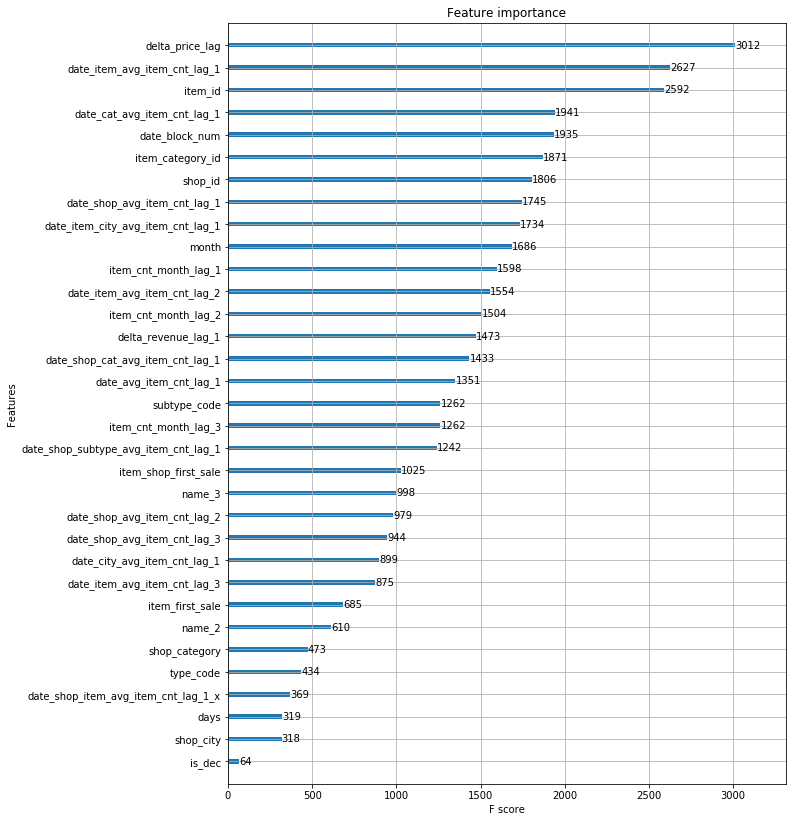

In [11]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

In [ ]:
#Your submission scored 0.90213

In [20]:
## Accurancy score
#from sklearn.metrics import accuracy_score
#accuracy_score(Y_pred, Y_valid.values), 1-accuracy_score(Y_pred, Y_valid.values)